In this notebook, I'm going to show how to make insurance price prediction with Regression. After doing the project, we'll enter the patient's information such as age, sex, region into the model and then predict the patient's charge.


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading The Data

In [ ]:
from google.colab import files
df = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
df1 = df.copy()

In [ ]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Understanding The Data

EDA   

In [ ]:
df1.shape

(1338, 7)

In [ ]:
df1.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
df1.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df1.tail(25)

,age,sex,bmi,children,smoker,region,charges
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1315,18,male,28.310,1,no,northeast,11272.33139
1316,19,female,20.600,0,no,southwest,1731.67700
1317,18,male,53.130,0,no,southeast,1163.46270
1318,35,male,39.710,4,no,northeast,19496.71917
1319,39,female,26.315,2,no,northwest,7201.70085
1320,31,male,31.065,3,no,northwest,5425.02335
1321,62,male,26.695,0,yes,northeast,28101.33305
1322,62,male,38.830,0,no,southeast,12981.34570


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
df1.describe()  #Let's take a look at summary statistics.

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Dealing with Missing Data

In [ ]:
df1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Preprocessing The Data

In [ ]:
sns.set_style("whitegrid")

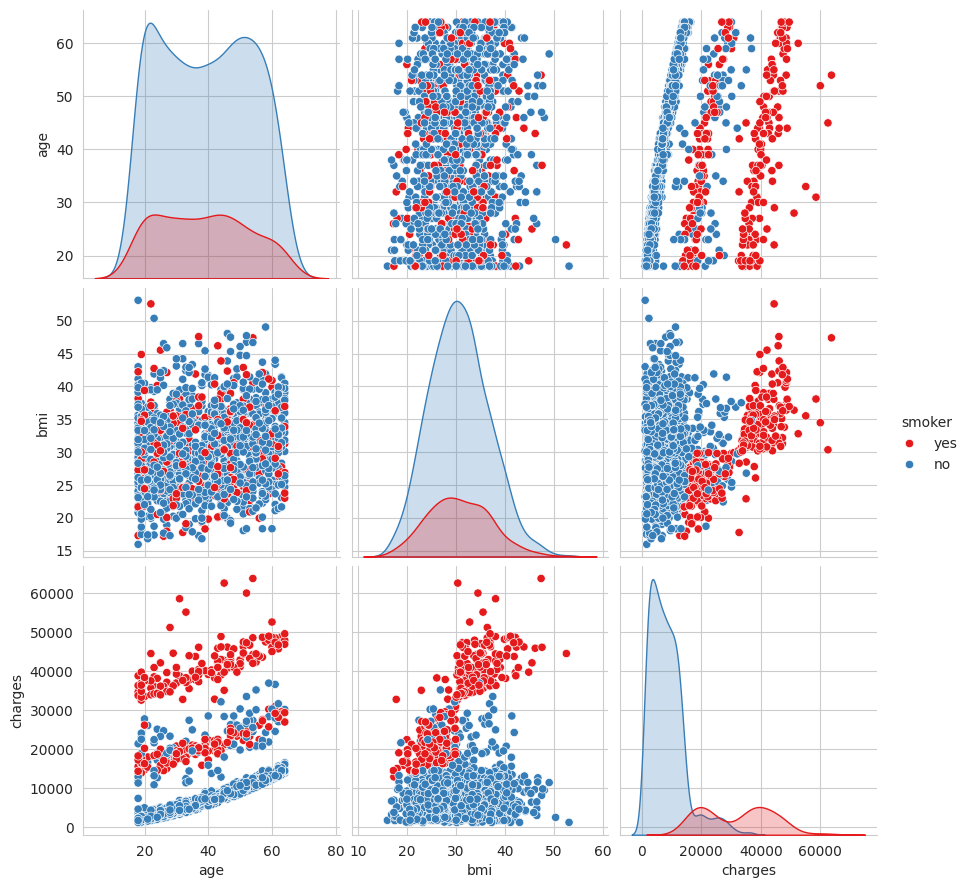

In [ ]:
sns.pairplot(df1[["age", "bmi", "charges", "smoker"]],
            hue = "smoker",
            height = 3,
            palette="Set1")

<ipython-input-23-005e2f68cb57>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr(),annot=True)


<Axes: >

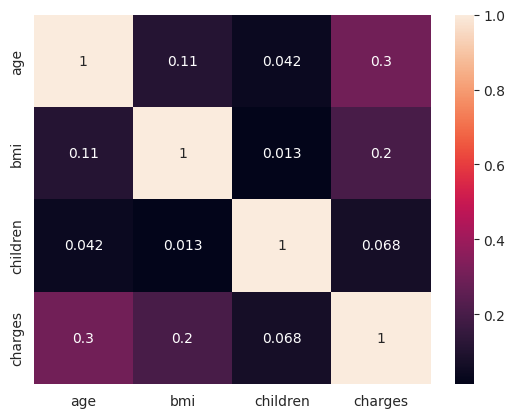

In [ ]:
sns.heatmap(df1.corr(),annot=True)


Some categorical variables have subcategories such as sex and smoker. We need to convert these categorical variables into a form that the scikit-learn library can understand.

In [ ]:
df1.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

Using get dummies

In [ ]:
df1=pd.get_dummies(df1)

In [ ]:
df1.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [ ]:
df1

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


Creating Input and Output Variables

In [ ]:
x = df1.drop(['charges'],axis=1)
y = df1['charges']

In [ ]:
x

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Data Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler
s = StandardScaler()
s.fit_transform(x)

array([[-1.43876426, -0.45332   , -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [-1.50996545,  0.5096211 , -0.07876719, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-0.79795355,  0.38330685,  1.58092576, ..., -0.56641788,
         1.63579466, -0.56641788],
       ...,
       [-1.50996545,  1.0148781 , -0.90861367, ..., -0.56641788,
         1.63579466, -0.56641788],
       [-1.29636188, -0.79781341, -0.90861367, ..., -0.56641788,
        -0.61132367,  1.76548098],
       [ 1.55168573, -0.26138796, -0.90861367, ...,  1.76548098,
        -0.61132367, -0.56641788]])

Splitting The Dataset

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)

Building The Model

In [ ]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

Evaluating The Model

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
y_pred

array([ 9.01636753e+03,  7.01997635e+03,  3.68708343e+04,  9.51853774e+03,
        2.69740308e+04,  1.10808462e+04, -4.06177600e+01,  1.71922331e+04,
        9.74950536e+02,  1.13299594e+04,  2.80574861e+04,  9.47838799e+03,
        4.98095281e+03,  3.84564701e+04,  4.03433327e+04,  3.71038753e+04,
        1.51982019e+04,  3.57689693e+04,  8.88568387e+03,  3.13835989e+04,
        3.79641903e+03,  1.02628964e+04,  2.37593679e+03,  7.26280819e+03,
        1.12875675e+04,  1.31383480e+04,  1.46241614e+04,  6.07324604e+03,
        1.00361537e+04,  1.97927814e+03,  9.07103928e+03,  1.31369887e+04,
        4.30868680e+03,  3.21105955e+03,  4.48957162e+03,  1.33774493e+04,
        1.82221028e+03,  8.79191682e+03,  3.31981518e+04,  3.25005781e+04,
        3.76368816e+03,  4.35479656e+03,  1.42473276e+04,  1.15436019e+04,
        8.70433805e+03,  1.22401028e+04,  5.20831471e+03,  2.98293172e+03,
        3.54465532e+04,  9.10285846e+03,  1.57820945e+04,  2.13473894e+03,
        1.24668220e+04,  

In [ ]:
y_test

764      9095.06825
887      5272.17580
890     29330.98315
1293     9301.89355
259     33750.29180
           ...     
701      9541.69555
672      4399.73100
1163     2200.83085
1103    11363.28320
1295     1964.78000
Name: charges, Length: 402, dtype: float64

In [ ]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [ ]:
mae = mean_absolute_error(y_test,y_pred)
mae

4145.450555627586

In [ ]:
mse = mean_squared_error(y_test,y_pred)
mse

33780509.57479164

In [ ]:
r2_score(y_test,y_pred)

0.7696118054369011

Predicting a New Data

In [ ]:
data_new = x_train[:1]

In [ ]:
data_new

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
332,61,31.16,0,1,0,1,0,0,1,0,0


In [ ]:
lr.predict(data_new)

array([13950.15333554])

So let's see the real value

In [ ]:
y_train[:1]

332    13429.0354
Name: charges, dtype: float64

As you can see, our model predicted close to the true value.

Polynomial Regression

In [ ]:
# Fitting Polynomial Regression to dataset
from sklearn.preprocessing import PolynomialFeatures
poly_reg = PolynomialFeatures(degree=5) # Tranforming
X_poly = poly_reg.fit_transform(x_train)
lin_reg2 = LinearRegression()
lin_reg2.fit(X_poly,y_train)


LinearRegression()

In [ ]:
#poly=X_poly.predict(x_test)

# Predicting new result with Polynomial Regression
y_pred2=lin_reg2.predict(poly_reg.fit_transform(x_test))

In [ ]:
y_pred2

array([   7456.71196449,    1933.18167245,   31492.40451729,
         11610.9258734 ,   37364.79373789,    1042.56071401,
          -985.64938223,   23392.1614691 ,   -6096.46338952,
         10253.99301207,   13952.02789962,    8127.80648863,
          3298.30410349,  -19849.92129159,   35608.57089591,
         43648.40097404,   12034.72597849,   37458.63259375,
          9840.06826365,   21990.26486886,    5179.05900502,
          7600.79020619,    2246.79020619,    -544.88178551,
          9792.10110605,   15692.03130043,   11754.75573981,
          6750.88919199,    8543.51006019,    -308.70290685,
          9297.66882575,   12857.92483652,    3843.64687693,
         15876.0202955 ,    4374.49723744,    9428.87602699,
          4249.95617926,    9204.42663825,   13724.60446846,
         40808.02402091,   -8779.5694555 ,    6877.40170348,
         15090.66784918,   14258.55648863,    8240.3478744 ,
          9400.7223351 ,   17227.30764902,    5211.8013941 ,
          4308.48984122,

In [ ]:
mae2= mean_absolute_error(y_test,y_pred2)

In [ ]:
mae2

7790.547563321025

In [ ]:
mse2=mean_squared_error(y_test,y_pred2)

In [ ]:
mse2

329279400.3189451

In [ ]:
r2=r2_score(y_test,y_pred2)

In [ ]:
r2